In [ ]:
'''
Implement the Image classification CNN model for classifying hand-written 
MNIST dataset by dividing the model into following 4 stages: 
a. Loading and preprocessing the image data 
b. Defining the model's architecture 
c. Training the model 
d. Estimating the model's performance 
'''

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Reproductibility
tf.keras.utils.set_random_seed(42)
np.random.seed(42)

In [10]:
# Load MNIST 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [11]:
# Scale pixels to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension for CNNs: (N, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train: ", x_train.shape, y_train.shape)
print("Test: ", x_test.shape, y_test.shape)

Train:  (60000, 28, 28, 1) (60000,)
Test:  (10000, 28, 28, 1) (10000,)


In [14]:
# CNN
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    
    layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.25),
    
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=2
)

Epoch 1/10
422/422 - 16s - 37ms/step - accuracy: 0.9274 - loss: 0.2379 - val_accuracy: 0.9827 - val_loss: 0.0578
Epoch 2/10
422/422 - 15s - 35ms/step - accuracy: 0.9772 - loss: 0.0741 - val_accuracy: 0.9878 - val_loss: 0.0415
Epoch 3/10
422/422 - 15s - 35ms/step - accuracy: 0.9832 - loss: 0.0542 - val_accuracy: 0.9885 - val_loss: 0.0376
Epoch 4/10
422/422 - 15s - 36ms/step - accuracy: 0.9865 - loss: 0.0423 - val_accuracy: 0.9903 - val_loss: 0.0343
Epoch 5/10
422/422 - 15s - 36ms/step - accuracy: 0.9886 - loss: 0.0355 - val_accuracy: 0.9908 - val_loss: 0.0332
Epoch 6/10
422/422 - 15s - 36ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 0.9917 - val_loss: 0.0322
Epoch 7/10
422/422 - 15s - 37ms/step - accuracy: 0.9914 - loss: 0.0274 - val_accuracy: 0.9895 - val_loss: 0.0381
Epoch 8/10
422/422 - 15s - 36ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9923 - val_loss: 0.0306
Epoch 9/10
422/422 - 17s - 41ms/step - accuracy: 0.9924 - loss: 0.0219 - val_accuracy: 0.9915 - 

In [18]:
# Evaluate model on unseen test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss:{test_loss:.4f} | Test Accuracy:{test_acc:.4f}")

Test loss:0.0212 | Test Accuracy:0.9929


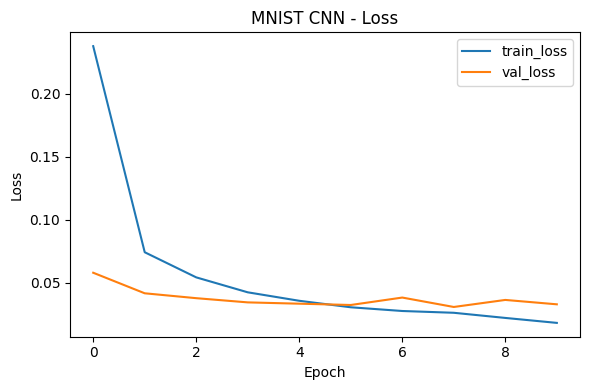

In [19]:
# Plot Training Vs Validation loss
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MNIST CNN - Loss")
plt.legend()
plt.tight_layout()
plt.show()

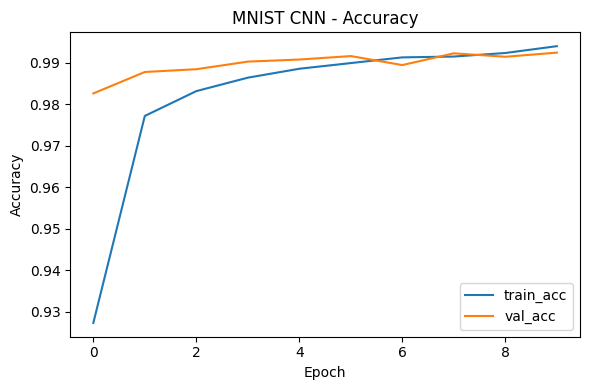

In [20]:
# Plot Training Vs Validation Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("MNIST CNN - Accuracy")
plt.legend()
plt.tight_layout()
plt.show()